In [5]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import sklearn.preprocessing
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns



In [6]:

x_train = pd.read_csv("train.csv")
x_test = pd.read_csv("test.csv")
y_train = pd.read_csv("labels.csv")
#px.imshow(x_train.corr(),title="Correlation Plot of the Heat Failure Prediction")



Matrices de Corrélation de Pearson et de Spearman

C:\Users\tfran\AppData\Local\Temp\ipykernel_6244\1508893005.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\tfran\AppData\Local\Temp\ipykernel_6244\1508893005.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



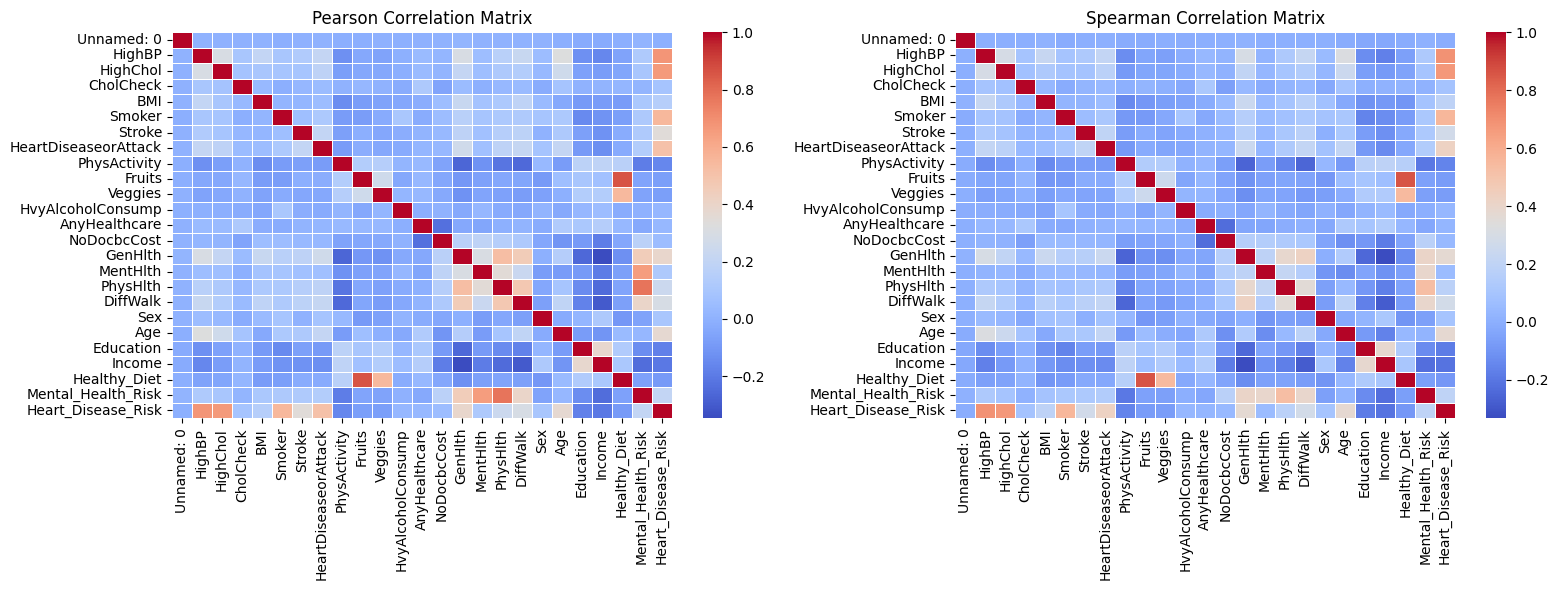

In [10]:


pearson_corr = x_train.corr(method='pearson')  
spearman_corr = x_train.corr(method='spearman')




plt.figure(figsize=(16, 6))


plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Matrix")


plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Matrix")

plt.tight_layout()
plt.show()


Histogramme des classes : grosse sureprésentation de 0

In [15]:
print(y_train)

        Unnamed: 0  Diabetes_binary
0            31141                0
1            98230                0
2            89662                1
3           208255                0
4           233415                0
...            ...              ...
202939      119879                0
202940      103694                0
202941      131932                0
202942      146867                0
202943      121958                1

[202944 rows x 2 columns]


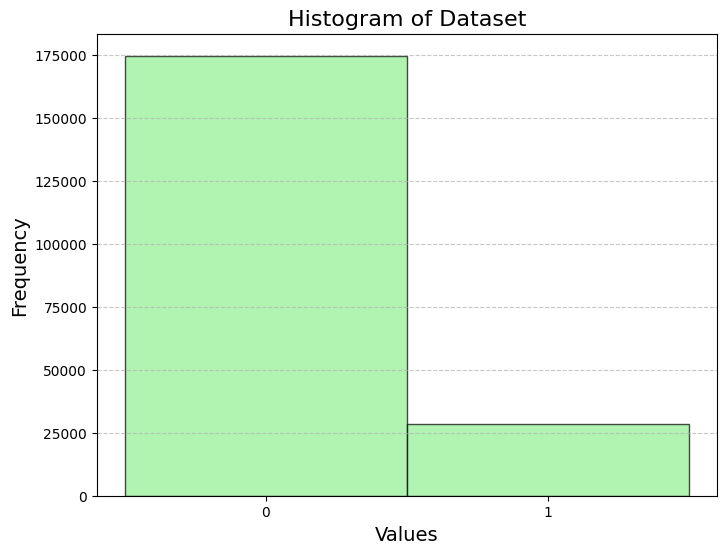

In [24]:
data=y_train['Diabetes_binary']

plt.figure(figsize=(8, 6))
plt.hist(data, bins=np.arange(data.min(), data.max() + 1.5) - 0.5, 
         edgecolor='black', color='lightgreen', alpha=0.7)
plt.title("Histogram of Dataset", fontsize=16)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks([0, 1]) 
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()


SMOTE pour générer des échantillons de la classe minoritaire pour équilibrer le dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt


# Display the original class distribution
print("Original class distribution:", Counter(y))

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Step 3: Visualize the effect of SMOTE (optional for datasets with 2D features)
plt.figure(figsize=(12, 6))

# Original dataset
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Resampled dataset
plt.subplot(1, 2, 2)
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap='viridis', edgecolor='k)
